In [1]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from cProfile import label
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot
from matplotlib.pyplot import*

In [3]:
print("*****- Daily prices for Bitcoin from 2017 -*****")
BTC = pdr.get_data_yahoo('BTC-USD', start="01/01/2017", interval="d")
BTC


*****- Daily prices for Bitcoin from 2017 -*****


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,37127036580,23957.529297


In [4]:
print("*****- Last quotations -***** ")
print(BTC.tail())

*****- Last quotations -***** 
                    High           Low          Open         Close  \
Date                                                                 
2022-08-09  23898.615234  22982.000000  23811.484375  23164.318359   
2022-08-10  24127.414062  22771.519531  23162.898438  23947.642578   
2022-08-11  24822.628906  23900.996094  23948.345703  23957.529297   
2022-08-12  24412.566406  23657.265625  23957.203125  24402.818359   
2022-08-13  24673.767578  24350.863281  24384.033203  24659.173828   

                 Volume     Adj Close  
Date                                   
2022-08-09  23555719219  23164.318359  
2022-08-10  32837431722  23947.642578  
2022-08-11  37127036580  23957.529297  
2022-08-12  27265804688  24402.818359  
2022-08-13  27409885184  24659.173828  


*****- Bitcoin closing prices -*****


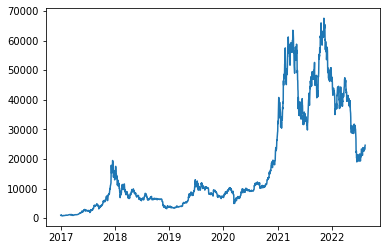

In [5]:
print('*****- Bitcoin closing prices -*****')
plot(BTC["Close"])
show()

In [6]:
print('*****- Data types of each variable -*****')
BTC.info()

*****- Data types of each variable -*****
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2051 entries, 2017-01-01 to 2022-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2051 non-null   float64
 1   Low        2051 non-null   float64
 2   Open       2051 non-null   float64
 3   Close      2051 non-null   float64
 4   Volume     2051 non-null   int64  
 5   Adj Close  2051 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.2 KB


In [7]:
print('*****- Simple returns of Bitcoin (R) -*****')
# .shift is used to get the previous value of a variable
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

*****- Simple returns of Bitcoin (R) -*****
Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-12    0.018587
2022-08-13    0.010505
Name: R, Length: 2051, dtype: float64


In [8]:
print('*****- Continously Compounded Returns (r) -*****')
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R', 'r']].copy()

*****- Continously Compounded Returns (r) -*****


In [9]:
# drop the first row as it doesn't count
BTC = BTC.dropna()

In [10]:
print('*****- Description of the function -*****')
sumret = BTC["R"].describe()
print(sumret)


*****- Description of the function -*****
count    2050.000000
mean        0.002427
std         0.041351
min        -0.371695
25%        -0.015875
50%         0.002220
75%         0.020911
max         0.252472
Name: R, dtype: float64


In [11]:
print('*****- Worse Bitcoin Days -*****')
print(BTC[BTC["R"] < -0.15])

*****- Worse Bitcoin Days -*****
                    High           Low          Open         Close  \
Date                                                                 
2017-09-14   3920.600098   3153.860107   3875.370117   3154.949951   
2018-01-16  13843.099609  10194.900391  13836.099609  11490.500000   
2018-02-05   8364.839844   6756.680176   8270.540039   6955.270020   
2020-03-12   7929.116211   4860.354004   7913.616211   4970.788086   
2022-06-13  26795.589844  22141.257812  26737.578125  22487.388672   

                 Volume     Adj Close         R         r  
Date                                                       
2017-09-14   2716310016   3154.949951 -0.187411 -0.207530  
2018-01-16  18853799936  11490.500000 -0.168548 -0.184582  
2018-02-05   9285289984   6955.270020 -0.159688 -0.173982  
2020-03-12  53980357243   4970.788086 -0.371695 -0.464730  
2022-06-13  68204556440  22487.388672 -0.159747 -0.174053  


In [12]:
print('*****- Best Bitcoin Days -*****')
print(BTC[BTC["R"] > 0.15].sort_values(by=['R'], ascending=False))

*****- Best Bitcoin Days -*****
                    High           Low          Open         Close  \
Date                                                                 
2017-12-07  17899.699219  14057.299805  14266.099609  17899.699219   
2017-07-20   2900.699951   2269.889893   2269.889893   2817.600098   
2017-12-06  14369.099609  11923.400391  11923.400391  14291.500000   
2021-02-08  46203.929688  38076.324219  38886.828125  46196.464844   
2020-03-19   6329.735840   5236.968750   5245.416504   6191.192871   
2019-04-02   4905.954590   4155.316895   4156.919434   4879.877930   
2019-10-25   8691.540039   7479.984375   7490.703125   8660.700195   
2017-07-17   2230.489990   1932.619995   1932.619995   2228.409912   
2017-09-15   3733.449951   2946.620117   3166.300049   3637.520020   

                  Volume     Adj Close         R         r  
Date                                                        
2017-12-07   17950699520  17899.699219  0.252472  0.225119  
2017-07-20    

In [13]:
print('*****- Main descriptive statistics -*****')
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ",
      BTC["r"].std())
print("The daily median return of Bitcoin is ", BTC["r"].median())

*****- Main descriptive statistics -*****
The daily average return of Bitcoin is  0.0015643050667411148
The daily variance of Bitcoin is  0.0017357310742239069
The daily standard deviation (volatility) of Bitcoin return is  0.04166210597442125
The daily median return of Bitcoin is  0.0022173493980961467


*****- Histogram for daily Bitcoin CCReturns -*****


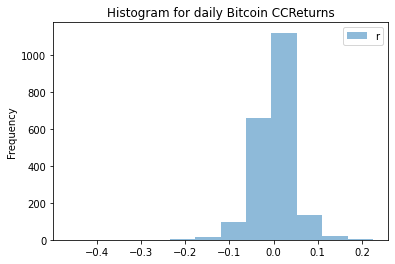

In [14]:
print('*****- Histogram for daily Bitcoin CCReturns -*****')
r_bitcoin = pd.DataFrame(BTC[["r"]])
hist = r_bitcoin.plot.hist(
    bins=12, alpha=0.5, title="Histogram for daily Bitcoin CCReturns")

CHALLENGE: THE HISTOGRAM SHOWS THE SIMPLE RETURNS OF BITCOIN ALONG TIME, 
HAVING THE MOST FREQUENCY AROUND -0.05 AND 0.05. THESE VALUES MAKE SENSE 
BECAUSE AS IT WAS SHOWN IN THE PREVIOUS CALCULATION THE STANDAR DEVIATION WAS
0.041369 AND ALSO, AS IT WAS PRACTICED WITH TE MAXIMUM AND THE MINIMUM
THERE ARE FEWER DAYS WITH THESE EXTREAME RATE CHANGES, THERFORE, MOST OF
THE DAYS THERE IS A RETUN BETWEEN -0.05 AND 0.05 

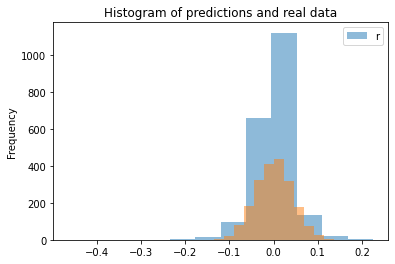

In [25]:
r_bitcoin = pd.DataFrame(BTC[["r"]])
hist = r_bitcoin.plot.hist(
    bins=12, alpha=0.5, title="Histogram of predictions and real data")
x = np.random.normal(loc=BTC["r"].mean(), scale=BTC["r"].std(), size=2050)
pyplot.hist(x, bins=12, alpha=0.5,)
#pyplot.hist(r_bitcoin, bins=12, alpha=0.5, label="real")
show()

DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? 

THERE IS A BIG DIFFERENCE BETWEEN THE REAL DATA (BLUE CHART) AND THE PREDICTIONS (ORANGE CHART). MAINLY WE CAN OBSERVE THAT THE REAL DATA GIVE US MORE FREQUENCY. ALSO, THE REAL CHART SEEMS TO DISTRIBUTE THE DATA IN FEWER NUMBERS, WHILE THE PREDICTED CHART HAS MORE BARS (WHICH MEANS IT IS DISTRIBUTED IN MORE NUMBERS)

**Notes**



1) Descriptive Statistics (history data)
Descriptive Statcis son usadas para resumir información que involucra raw data. The most important descriptive statistics are:
a. Measures of central tendency
Measures of dispersion

El propósito es resumir la raw data con algo que representa a todas las observaciones

Central tendency measures

Arithmetic mean - Promedio de la suma de todos los datos, divididos entre el número de datos. Sin embargo no es la mejor forma de representar los datos,especialmente si es información sesgada. Es como la paradoja de que si tu tienes 2 coches y y tu amigo ninguno, el promedio es que cada quien tiene 1 y definitivamente no es una buena forma de representarlo.

Mediana - La mediana es realmente el punto medio más representativo cuando existe información sesgada, o bueno, realmente es la mejor forma de representar datos en general. La mediana también es conocido como el 50 percentil, que significa que es el MIDDLE POINT AFTER SORTING

Moda - Es el valor que más se repite en los datos obtenidos. Mode can be calculated only for discrete variables, not for continuous variables

NOTA: 
The arithmetic mean is very sensible to extreme values, while the median is not.

Dispersion Measures

	a. Varianza y desviación estándar
	Ambos son utilizados para medir cuánto en promedio, los valores individuales difieren del promedio
	
	Varianza
	Si se divide entre n-1 se dice que se está calculando la varianza muestra (sample variance) 
	Si se divide entre n se dice que se está calculando la population variance
	Ambas fórmulas proporcionan resultados parecidos, pero el sample variance será un poco mayor, por lo tanto es un valor más conservativo.
	b. Percentiles
	c. Value at risk


La invención del histograma


El histograma es un breakthrough y representa una base importante para toda la estadística. Fue inventado para ilustrar cómo los valores de una variable random se distribuyen en un rango de valores. The histogram is a frequency plot. And was first invented to decipher encrypted messages.

The most important foundations/pilars of both, Statistics and the theory of Probability are:
	• The invention of the Histogram
	• The discovery of the Central Limit Theorem


Probability Density Function

The Probability Density Function (PDF) of a discrete random variable X is the probability of X to be equal to a specific value xi:


The CDF of a discrete random variable is defined as the sum of the probabilities of the independent outcomes. However, when using a continuous random variable the CDF will be defined as the integration of the function f(x) (f(x) is the PDF).



The Normal Distribution Function

In statistics, the most popular continuous PDF is the well-known “bell-shaped” normal distribution, which PDF is defined as:
